# Assignment 1 - Introduction to Machine Learning

In this assignment, I used the Breast Cancer Wisconsin (Diagnostic) Database to create a KNN (K-Nearest Neighbor) classifier to classify patients' tumors as malignant or benign. The goal of this classifer was to create a simple diagnostic to determine whether or not patients may have breast cancer.

In [36]:
% matplotlib notebook

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# Print the data set description
print(cancer.DESCR) 

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

Note: The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [37]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

### Question 0 (Example) - How many features does the breast cancer dataset have?

In [38]:
def answer_zero():
    
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    return len(cancer['feature_names'])

answer_zero() 

30

### Question 1 - Convert the sklearn.dataset `cancer` to a DataFrame. 

Note: Use the following columns and index while creating the DataFrame:

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [39]:
def answer_one():
    
    df = pd.DataFrame(cancer['data'])
    df.columns = cancer['feature_names']
    # Convert to float upon grader's recommendation
    df['target'] = cancer['target'].astype(float)
    
    return df

answer_one()['target'][0:10]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: target, dtype: float64

### Question 2 - What is the class distribution? (i.e. how many instances of `malignant` (encoded 0) and how many `benign` (encoded 1)?)

In [40]:
def answer_two():
    
    cancerdf = answer_one()
    # Determine class distribution by identifying tumors as "malignant (0)" or "benign (1)"
    candict = {0: 'malignant', 1: 'benign'}
    mapped = cancerdf['target'].map(candict)
    # Find number of tumors by category (malignant or benign)
    target = cancerdf['target'].groupby(mapped).count()
    
    return target

answer_two()

target
benign       357
malignant    212
Name: target, dtype: int64

### Question 3 - Split the DataFrame into `X` (the data) and `y` (the labels).

In [51]:
def answer_three():
    
    cancerdf = answer_one()
    X = cancerdf.drop('target', axis=1)
    y = cancerdf['target']
    
    return X, y

answer_three()[0].head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### Question 4 - Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

In [52]:
from sklearn.model_selection import train_test_split

def answer_four():
    
    X, y = answer_three()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    return X_train, X_test, y_train, y_test

answer_four()[0].head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
346,12.060,18.90,76.66,445.3,0.08386,0.05794,0.007510,0.008488,0.1555,0.06048,...,13.64,27.06,86.54,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083
357,13.870,16.21,88.52,593.7,0.08743,0.05492,0.015020,0.020880,0.1424,0.05883,...,15.11,25.58,96.74,694.4,0.11530,0.10080,0.05285,0.05556,0.2362,0.07113
355,12.560,19.07,81.92,485.8,0.08760,0.10380,0.103000,0.043910,0.1533,0.06184,...,13.37,22.43,89.02,547.4,0.10960,0.20020,0.23880,0.09265,0.2121,0.07188
112,14.260,19.65,97.83,629.9,0.07837,0.22330,0.300300,0.077980,0.1704,0.07769,...,15.30,23.73,107.00,709.0,0.08949,0.41930,0.67830,0.15050,0.2398,0.10820
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750


### Question 5 - Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

In [53]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    knn = KNeighborsClassifier(n_neighbors=1)
    
    return knn.fit(X_train, y_train)

answer_five()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Question 6 - Using the knn classifier (from Question 5), predict the class label using the mean value for each feature.

In [54]:
def answer_six():
    
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    
    # Use fitted knn model for prediction
    knn = answer_five()
    prediction = knn.predict(means)
    
    return prediction 

answer_six()

array([ 1.])

### Question 7 - Using your knn classifier, predict the class labels for the test set `X_test`.

In [55]:
def answer_seven():
    
    X_train, X_test, y_train, y_test = answer_four()
    
    # KNN classifier
    knn = answer_five()
    
    return knn.predict(X_test)

answer_seven()

array([ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.])

### Question 8 - Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

In [56]:
def answer_eight():
    
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    return knn.score(X_test, y_test)
    
answer_eight()

0.91608391608391604

---

### Optional plot

Use the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

<IPython.core.display.Javascript object>


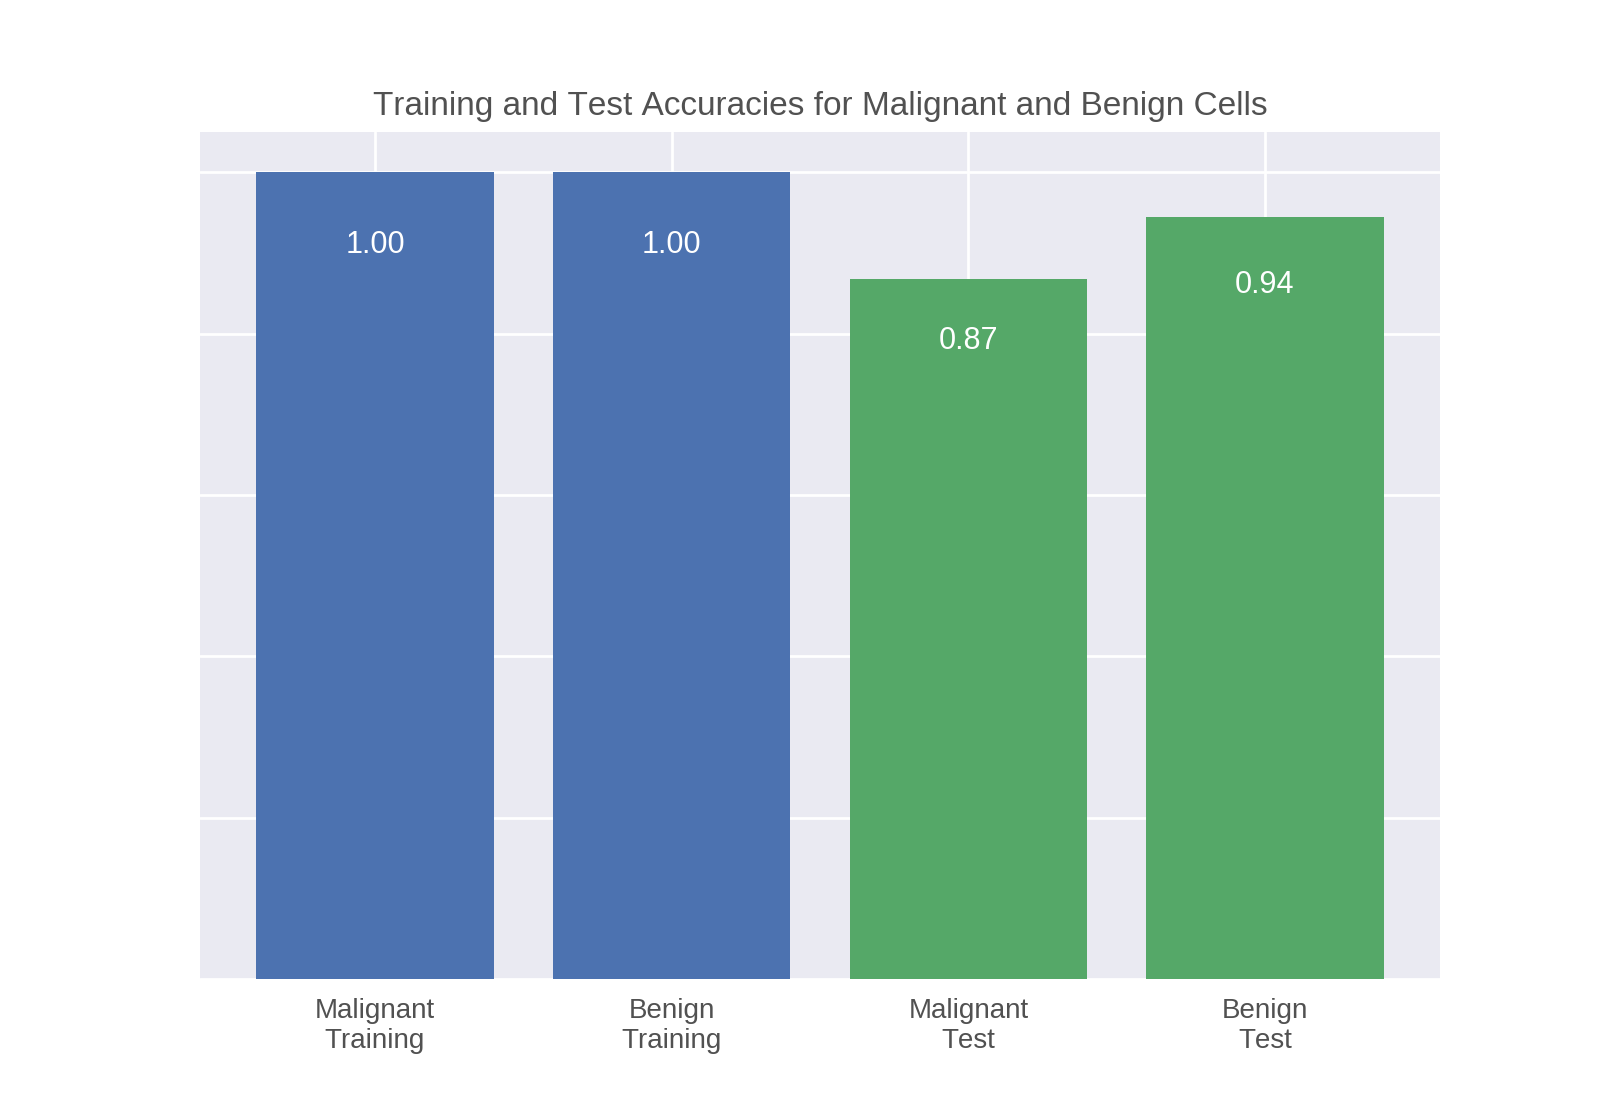

In [57]:
def accuracy_plot():
    
    import matplotlib.pyplot as plt

    %matplotlib notebook

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # Directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # Remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # Remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)
    
accuracy_plot() 

---

# Assignment 2 - Model Complexity and Generalization Performance

In this assignment I explored the relationship between model complexity and generalization performance. This involved adjusting key parameters of various supervised learning models. 

* **Part 1** focuses on **regression**.

* **Part 2** focuses on **classification**.

## Part 1 - Regression

First, run the following block to set up the variables needed for later sections.

In [58]:
% matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


# Visualize the dataset
def part1_scatter():
    
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

### Question 1 - Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. 

*Hint: Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model*
    
**For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.**

<img src="readonly/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def answer_one():

    deg = [1, 3, 6, 9]
    pred_vals = np.zeros((4, 100))
    
    for i, deg in enumerate(deg):
        polys = PolynomialFeatures(degree = deg)
        X_fitted = polys.fit_transform(X_train.reshape(-1, 1))
        
        # Fit linear regression model:
        model = LinearRegression().fit(X_fitted, y_train)
    
        # Make a prediction for the fit: 
        transformed = polys.fit_transform(np.linspace(0,10,100).reshape(100, 1))
        y_pred = model.predict(transformed)
        pred_vals[i,:] = y_pred
        
    return pred_vals

answer_one()[0:1]

array([[ 0.2530402 ,  0.26920155,  0.2853629 ,  0.30152425,  0.3176856 ,
         0.33384695,  0.35000831,  0.36616966,  0.38233101,  0.39849236,
         0.41465371,  0.43081507,  0.44697642,  0.46313777,  0.47929912,
         0.49546047,  0.51162182,  0.52778318,  0.54394453,  0.56010588,
         0.57626723,  0.59242858,  0.60858994,  0.62475129,  0.64091264,
         0.65707399,  0.67323534,  0.6893967 ,  0.70555805,  0.7217194 ,
         0.73788075,  0.7540421 ,  0.77020345,  0.78636481,  0.80252616,
         0.81868751,  0.83484886,  0.85101021,  0.86717157,  0.88333292,
         0.89949427,  0.91565562,  0.93181697,  0.94797832,  0.96413968,
         0.98030103,  0.99646238,  1.01262373,  1.02878508,  1.04494644,
         1.06110779,  1.07726914,  1.09343049,  1.10959184,  1.1257532 ,
         1.14191455,  1.1580759 ,  1.17423725,  1.1903986 ,  1.20655995,
         1.22272131,  1.23888266,  1.25504401,  1.27120536,  1.28736671,
         1.30352807,  1.31968942,  1.33585077,  1.3

<IPython.core.display.Javascript object>


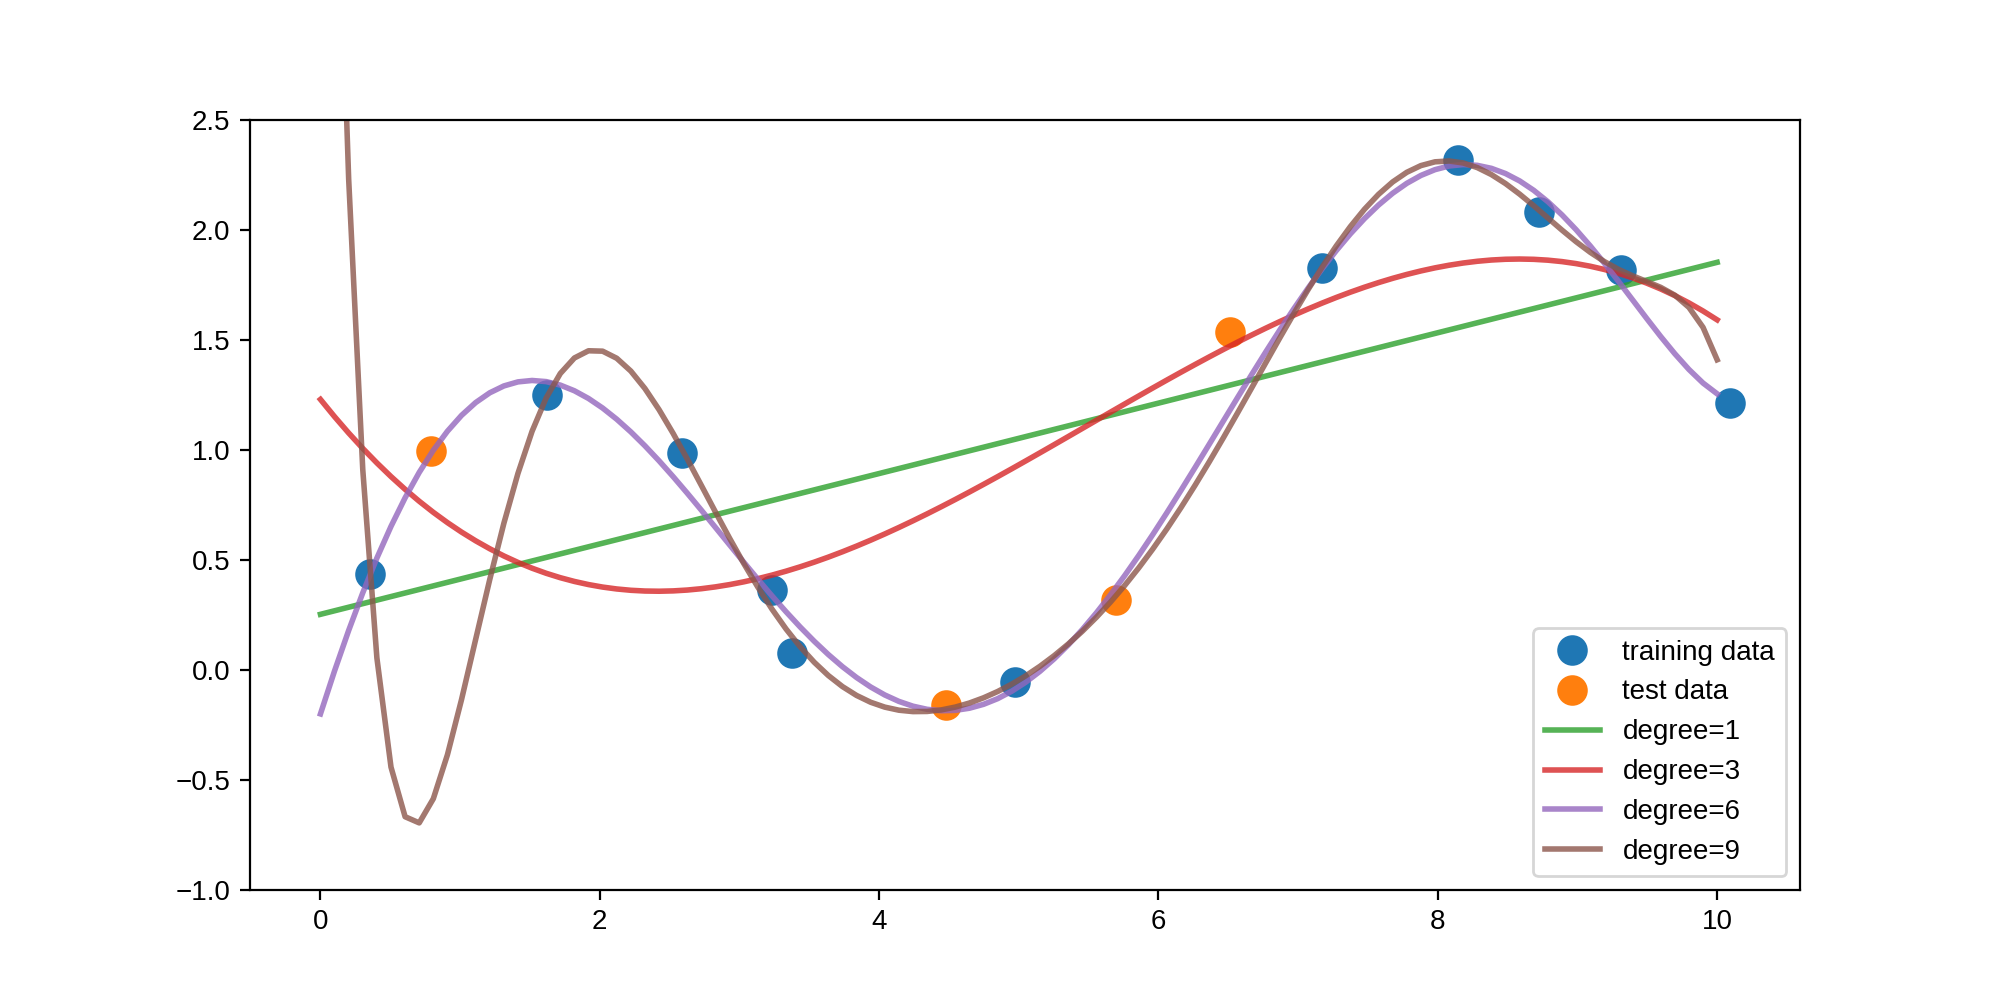

In [15]:
def plot_one(degree_predictions):
    
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 2 - Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. 

**For each model**:
    
* **Compute the $R^2$ (coefficient of determination) regression score on the training data and the testing data**.

* **Return both of these arrays in a tuple**.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [16]:
from sklearn.metrics.regression import r2_score

def answer_two():
    
    # Create a list for each polynomial degree. Use this for fitting the training data
    deg_list = list(range(0, 10))
    length = len(deg_list)
    
    r2_train = np.zeros(length)
    r2_test = np.zeros(length)
    
    # Fit a polynomial Linear Regression model for degrees 0 through 9
    for i in range(length):
        
        # 1) Fit: Transform training data into polynomial
        polys = PolynomialFeatures(degree = deg_list[i])
        X_train_fitted = polys.fit_transform(X_train.reshape(-1, 1))
        X_test_fitted = polys.fit_transform(X_test.reshape(-1, 1))
        
        # 2) Classifier: Create a polynomial linear regression model using the transformed training data:
        model = LinearRegression().fit(X_train_fitted, y_train)
    
        # 3) Evaluate: Compute coefficient of determination (R^2) regression score
        ## Training data:
        r2_train[i] = model.score(X_train_fitted, y_train)
        ## Testing data: 
        r2_test[i]= model.score(X_test_fitted, y_test)
        
    return (r2_train, r2_test)

answer_two()

(array([ 0.        ,  0.42924578,  0.4510998 ,  0.58719954,  0.91941945,
         0.97578641,  0.99018233,  0.99352509,  0.99637545,  0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247951, -0.64525377]))

### Question 3 - Based on the $R^2$ scores from question 2 (degree levels 0 through 9), find the degree level that corresponds to a model that is 1) underfitting, 2) overfitting, and has 3) good generalization performance on this dataset.

*Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship between degree level and $R^2$. Remember to comment out the import matplotlib line before submission*.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`. There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).* 

In [17]:
def answer_three():
    
    # Use  R^2 scores
    scores = answer_two()
    # Evaluate performance of models for polynomial degrees 0 through 9 (degrees represented as the index value)
    perform = pd.DataFrame({'train': scores[0], 'test' : scores[1], 'difference': scores[0] - scores[1]})
    
    
    # Find the polynomial degree of the model exemplifying the following category:
    ## Underfitting: Testing is far below training data 
    Underfitting = perform.sort_values(by=['train']).index[0]
    
    ## Overfitting: Greatest difference between training and testing exhibits overfitting
    Overfitting = perform.sort_values(by=['difference'], ascending=False).index[0]
    
    ## Good Generalization: Least differnece between training and testing 
    Good_Generalization = perform.sort_values(by=['difference']).index[0]
    
    return (Underfitting, Overfitting, Good_Generalization)

answer_three()

(0, 9, 6)

### Question 4 - For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

In [18]:
from sklearn.linear_model import Lasso

def answer_four():

    # For both:
    ## 1) Transform
    poly = PolynomialFeatures(degree = 12)
    X_train_fitted = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_fitted = poly.fit_transform(X_test.reshape(-1, 1))
    
    # Model A): Linear Regression model:
    ## 2) Classifier
    linear = LinearRegression().fit(X_train_fitted, y_train)
    ## 3) Evaluation: Coefficient of dermination on testing data
    LinearRegression_R2_test_score = linear.score(X_test_fitted, y_test)
    
    # Model B): Lasso Model:
    ## 2) Classifier
    lasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_fitted, y_train)
    ## 3) Evaluation: Coefficient of determination on testing data
    Lasso_R2_test_score = lasso.score(X_test_fitted, y_test)
    
    return (LinearRegression_R2_test_score, Lasso_R2_test_score)

answer_four()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.3120017974975458, 0.8406625614750235)

## Part 2 - Classification 

### For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `readonly/mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [19]:
mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, create a smaller version of the entire mushroom dataset.
# For simplicity, reuse the 25% test split created above as the representative subset.
X_subset = X_test2
y_subset = y_test2

### Question 5 - Using `X_train2` and `y_train2` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

*Note: The feature names are available in the `X_train2.columns` property. The order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property. Also, remember that you also need to set random_state in the DecisionTreeClassifier.* 

In [20]:
from sklearn.tree import DecisionTreeClassifier

def answer_five():

    # Fit decision tree
    tree = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
    
    # Determine column name and feature importance score for the classifier
    features = dict(zip(X_train2.columns, tree.feature_importances_))
    
    # Obtain top 5 most important features, sorted by highest feature importance score
    top = sorted(features.items(), key=lambda x: x[1], reverse=True)
    
    result = []
    for i in range(5):
        result.append(top[i][0])
    return result

answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6 - Use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.  

Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.

The initialized unfitted classifier object is a Support Vector Classifier with radial basis kernel.  So your first step is to create an `SVC` object with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  

#### With this classifier, and the dataset in X_subset, y_subset, explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter.  In this case, we want to use "accuracy" as the scoring metric.

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

#### Find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

def answer_six():    
    
    param_range = np.logspace(-3, 3, 4)
    
    # Cross validation
    training_scores, test_scores = validation_curve(SVC(kernel='rbf', C=1, random_state=0), X_subset, y_subset,
                                                param_name='gamma', 
                                                param_range=np.logspace(-4, 1, 6), cv=3)
    
    # Average across the columns to find mean score for each gamma level 
    training_scores = np.mean(training_scores, axis=1)
    test_scores = np.mean(test_scores, axis=1)
    
    return (training_scores, test_scores)

answer_six()

(array([ 0.56647847,  0.93155951,  0.99039881,  1.        ,  1.        ,  1.        ]),
 array([ 0.56768547,  0.92959558,  0.98965952,  1.        ,  0.99507994,
         0.52240279]))

### Question 7 - Based on the scores from question 6, what gamma value corresponds to a model that is 1) underfitting (and has the worst test set accuracy), 2) overfitting (and has the worst test set accuracy), and is 3) the  best choice with good generalization performance on this dataset (high accuracy on both training and test set)? 

*Hint: Try plotting the scores from question 6 to visualize the relationship between gamma and accuracy.*

In [22]:
def answer_seven():
    
    # This contains the gamma values corresponding to the six models
    gamma = np.logspace(-4, 1, 6)
    
    # Use mean scores from Question #6
    scores = answer_six()
    model = pd.DataFrame({'train': scores[0], 'test' : scores[1], 'difference': scores[0] - scores[1]})
    
    # Find the gamma value for the model exemplifying the following category:
    ## Underfitting: Testing is far below training data 
    Underfitting = model.sort_values(by=['difference']).index[0]
    
    ## Overfitting: Greatest difference between training and testing exhibits overfitting
    Overfitting = model.sort_values(by=['difference'], ascending=False).index[0]
    
    ## Good Generalization: Least differnece between training and testing 
    Good_Generalization = model.sort_values(by=['test'], ascending=False).index[0]
    
    # This represents the gamma values corresponding to the following models:
    ##1) Underfitting, 2) Overfitting, and 3) Good Generalization
    return (gamma[Underfitting], gamma[Overfitting], gamma[Good_Generalization])

answer_seven()

(0.0001, 10.0, 0.10000000000000001)

# Assignment 3 - Evaluation

In this assignment, I trained and evaluated how effectively several models can predict instances of fraud. 


The data is based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud):
 
* Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
* The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [23]:
import numpy as np
import pandas as pd

### Question 1 - What percentage of the observations in the dataset are instances of fraud? Import the data from `fraud_data.csv`. 

In [24]:
def answer_one():
    
    df = pd.read_csv("fraud_data.csv")
    
    # Stores number of non-fradulent (Class=0) and fradulent (Class=1) transactions
    val = df['Class'].value_counts()
    
    # Percentage of fradulent transactions
    return val[1] / df['Class'].count()

answer_one()

0.016410823768035772

In [25]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2 - Train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score

def answer_two():
    
    # Use majority class for predictions
    dummy_major = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_predict = dummy_major.predict(X_test)
    
    # Accuracy: Percentage of correct predictions) 
    accuracy = dummy_major.score(X_test, y_test)
    # Recall: Percentage of correctly identifying class 1 (fraud transactions)
    recall = recall_score(y_test, y_predict)
    
    return (accuracy, recall)

answer_two()

(0.98525073746312686, 0.0)

### Question 3 - Train a SVC classifer, using the default parameters. What is the accuracy, recall, and precision of this classifier?

In [27]:
from sklearn.metrics import precision_score
from sklearn.svm import SVC

def answer_three():

    # 1) Fit Model 
    svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
    
    # 2) Make class predictions for card transactions
    y_pred = svm.predict(X_test)
    
    # 3) Scoring metrics
    ## Accuracy: Proportion of correctly identifying any transaction as non-fradulent/fraudlent
    accuracy = svm.score(X_test, y_test)
    
    ## Recall: Proportion of fraudulent transactions that were identified correctly as fraudulent
    recall = recall_score(y_test, y_pred)
    
    ## Precision: Proportion of labeled fraudulent transactions that actually were fraudulent
    precision = precision_score(y_test, y_pred)
    
    return (accuracy, recall, precision)

answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

In [28]:
from sklearn.metrics import confusion_matrix

def answer_four():
    
    # 1) Fit classifier
    svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    
    ## Create a threshold of -220 for class predictions
    threshold = -220
    
    y_predict = svm.decision_function(X_test)
    y_predict = np.where(y_predict >= threshold, 1, 0)
    
    # Use predicted class labels (non-fraud/fraud) to assess classifier's performance
    matrix = confusion_matrix(y_test, y_predict)
    
    return matrix

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5 Train a logisitic regression classifier with default parameters. For the logisitic regression classifier, create a precision recall curve and a roc curve.

#### Looking at the precision recall curve, what is the recall when the precision is `0.75`?

#### Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

<IPython.core.display.Javascript object>


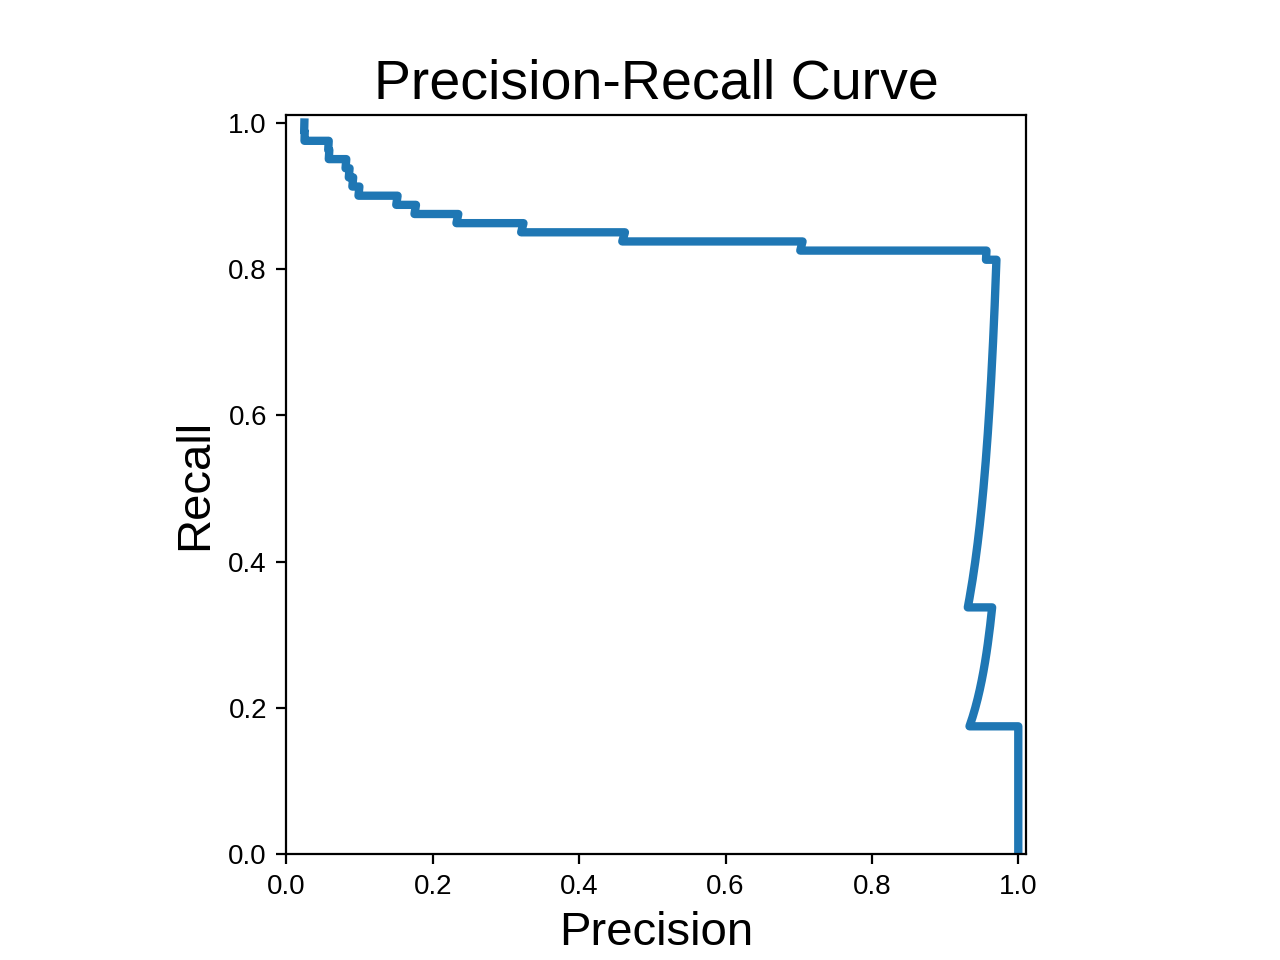

Based on the Precision-Recall graph, the recall is 0.825 when the precision is 0.75.


<IPython.core.display.Javascript object>


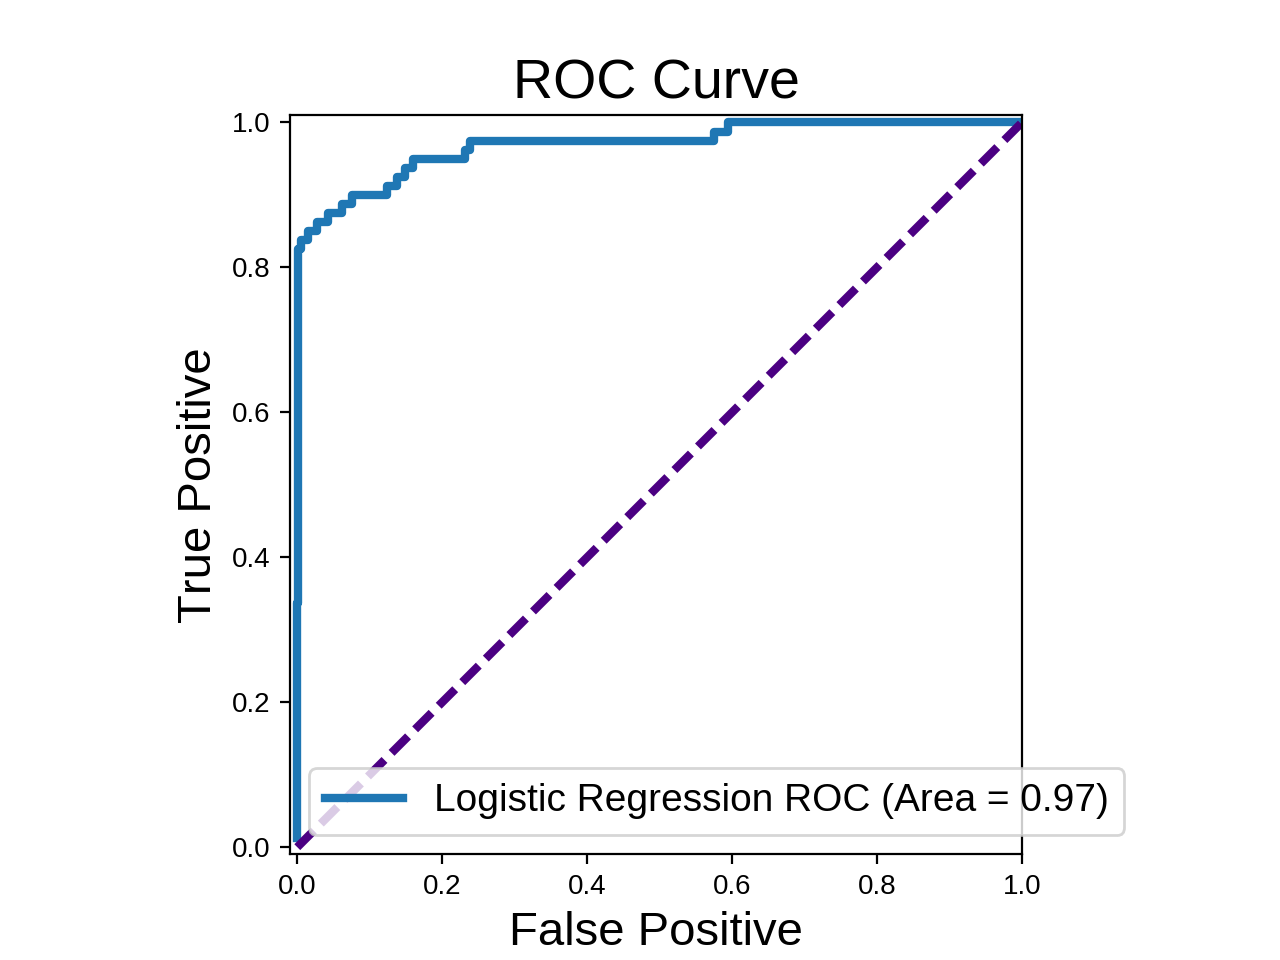

Based on the ROC graph, the true positive rate is 0.9375 when the false positive rate is 0.16.


(0.82499999999999996, 0.9375)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

def answer_five():

    # Determine classifier score for how likely the postive class is predicted
    lr = LogisticRegression().fit(X_train, y_train)
    y_scores = lr.decision_function(X_test)

    # a) Precision-Recall Curve: Determine recall when precision = 0.75
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    val_precision = np.argmin(np.abs(precision - 0.75))
    val_recall = recall[val_precision]

    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, lw=3, label='Precision-Recall')
    plt.title('Precision-Recall Curve', fontsize=20)
    plt.xlabel('Precision', fontsize=17)
    plt.ylabel('Recall', fontsize=17)
    plt.axes().set_aspect('equal')
    plt.show()

    # Conclusion a):
    print("Based on the Precision-Recall graph, the recall is {} when the precision is 0.75.".format(val_recall))

    ## b) ROC Curve: Determine true positive rate when false positive rate = 0.16
    false_pos, true_pos, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(false_pos, true_pos)
    val_false_pos = np.argmin(np.abs(false_pos - 0.16))
    val_true_pos = true_pos[val_false_pos]

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(false_pos, true_pos, lw=3, label='Logistic Regression ROC (Area = {:0.2f})'.format(roc_auc))
    plt.title('ROC Curve', fontsize=20)
    plt.xlabel('False Positive', fontsize=17)
    plt.ylabel('True Positive', fontsize=17)
    plt.legend(loc='lower left', fontsize=14)
    plt.plot([0, 1], [0, 1], color='indigo', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

    # Conclusion b):
    print("Based on the ROC graph, the true positive rate is {} when the false positive rate is 0.16.".format(val_true_pos))
    
    return (val_recall, val_true_pos)

answer_five()

### Question 6 - Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

In [30]:
from sklearn.model_selection import GridSearchCV

def answer_six():    
    
    # 1) Logistic Regression Classifier 
    log = LogisticRegression().fit(X_train, y_train)
    y_scores = log.decision_function(X_test)
    
    # 2) Cross Validation parameters
    params = [{'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}]
    
    # 3) Use recall to determine the total amount of relevant card transactions that actually were fraud
    grid = GridSearchCV(log, param_grid = params, scoring='recall')
    grid.fit(X_train, y_train)
    y_decision_scores = grid.decision_function(X_test) 
    
    
    # 4) Results of cross validation
    print('Grid best parameter (max. accuracy): ', grid.best_params_)
    print('Grid best score (accuracy): ', grid.best_score_)
    
    ## Mean test scores: Odd (L1) and Even (L2) values
    odd_means = grid.cv_results_['mean_test_score'][0::2]
    even_means = grid.cv_results_['mean_test_score'][1::2]
    
    ## Final result: Summary chart of regularization and mean test scores:
    chart = pd.DataFrame({'l1': odd_means, 'l2': even_means}, index=[0.01, 0.1, 1, 10, 100])
    
    return chart

answer_six()

Grid best parameter (max. accuracy):  {'C': 10, 'penalty': 'l2'}
Grid best score (accuracy):  0.811594202899


,l1,l2
0.01,0.666667,0.760870
0.10,0.800725,0.804348
1.00,0.811594,0.811594
10.00,0.807971,0.811594
100.00,0.807971,0.807971


In [ ]:
import seaborn as sns

# Visualize results from the grid search
def GridSearch_Heatmap(scores):
    
    plt.figure()
    sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())